# PLAN:

### Data preparation:
- [ ] import
- [ ] train / test split 
    - [ ] Data preprocessing
        - [ ] scale

### Import  models:
- [ ] import file with models details
- [ ] import models based on previously imported file

### Loss function analysis
- [ ] compare all
- [ ] plot the one that corresponds to best performance


### 1-session prediction analysis:
- [ ] one 1-session prediction
- [ ] n 1-session predictions

### 20-session prediction analysis:
- [ ] one 20-sessions prediction
- [ ] n 20-sessions predictions

### Simulation:
- [ ] Based on best model's predictions simulation of traiding

---

# DATA PREPARATION

### Data preparation:
- [ ] import
- [ ] train / test split 
    - [ ] Data preprocessing
        - [ ] scale
        
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
start_date = '2000-01-01'
end_date = '2018-01-01'

In [3]:
'''
import pandas_datareader as pdr

df_to_save = pdr.DataReader(name='AAPL', data_source='yahoo', start=start_date, end=end_date)
df_to_save.head(5)

df_to_save.to_csv('AAPL_YAHOO.csv')

'''

df = pd.read_csv('AAPL_YAHOO.csv', index_col='Date', parse_dates=True)

In [4]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,2.655498
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,2.431611


In [5]:
df_close = df[['Close']].copy()
df_close.head(5)

,Close
Date,
2000-01-03,3.997768
2000-01-04,3.660714
2000-01-05,3.714286
2000-01-06,3.392857
2000-01-07,3.553571


In [6]:
df_close.describe()

,Close
count,4528.000000
mean,44.043818
std,46.634542
min,0.937143
25%,3.945612
50%,23.425000
75%,78.434282
max,176.419998


Text(0, 0.5, 'Price [USD]')

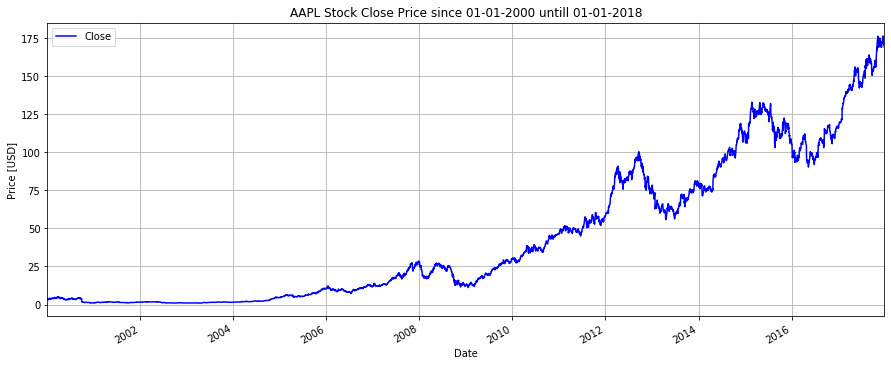

In [7]:
df_close.plot(figsize=(15, 6), 
                         color='blue', 
                         grid=True, 
                         title='AAPL Stock Close Price since 01-01-2000 untill 01-01-2018')
plt.ylabel('Price [USD]')

### Data preparation:
- [x] __import__
- [ ] train / test split 
    - [ ] Data preprocessing
        - [ ] scale

# TRAIN / TEST SPLIT

In [8]:
len(df_close)

4528

## TRAIN (4400) / TEST (128)

In [9]:
# Train set
train = df_close.iloc[:4400] # pandas.core.series.Series (4500,) **
train_index = train.index # pandas.core.indexes.datetimes.DatetimeIndex

# Test set # 128 sessions
test = df_close.iloc[4400:] # pandas.core.series.Series (128,) **
test_index = test.index # pandas.core.indexes.datetimes.DatetimeIndex

Text(0.5, 1.0, 'AAPL Stock Close Price since 01-01-2000 untill 01-01-2018')

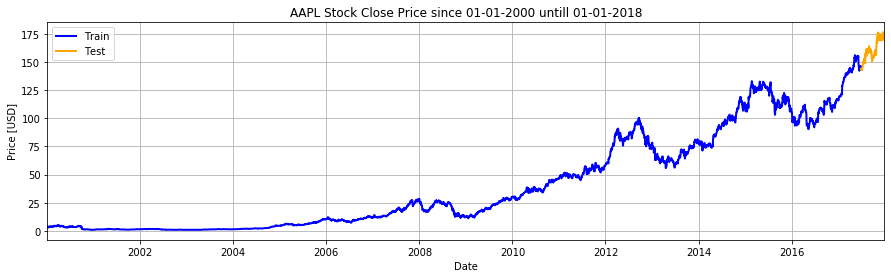

In [10]:
plt.figure(figsize=(15, 4))
plt.autoscale(tight=True, axis='x')
plt.grid(True)
plt.plot(train, lw=2, color='blue')
plt.plot(test, lw=2, color='orange')
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('Price [USD]')
plt.title('AAPL Stock Close Price since 01-01-2000 untill 01-01-2018')

---

### Data preparation:
- [x] __import__
- [x] __train / test split__
    - [ ] Data preprocessing
        - [ ] scale
        
---

# DATA PREPROCESSING

## MINMAXSCALER

In [11]:
from sklearn.preprocessing import MinMaxScaler 

In [12]:
# From Pandas TimeSeries into NumPy array
# Train
train = train.values # numpy.ndarray (4400,)
train = train.reshape((len(train), 1)) # numpy.ndarray (4400, 1)

# Test
test = test.values # numpy.ndarray (128,)
test = test.reshape((len(test), 1)) # numpy.ndarray (128, 1)

In [13]:
# Fit the train data only. You don't want to provide any clue about test set condition.
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
# Transform the data then export to Pandas TimeSeries as began
# Train
train_norm = scaler.transform(train) # numpy.ndarray (4400, 1)
train_norm = train_norm.tolist() # list of single value lists [[x], [y], [z]]
train_norm = np.squeeze(train_norm) # numpy.ndarray array([x, y, z])
train_norm = pd.Series(train_norm, train_index) # pandas.core.series.Series (4500,) **

# Test
test_norm = scaler.transform(test) # numpy.ndarray (128, 1)
test_norm = test_norm.tolist() # list of single value lists [[x], [y], [z]]
test_norm = np.squeeze(test_norm) # numpy.ndarray array([x, y, z])
test_norm = pd.Series(test_norm, test_index) # pandas.core.series.Series (128,) **

In [15]:
train_norm.head(5)

Date
2000-01-03    0.019725
2000-01-04    0.017553
2000-01-05    0.017898
2000-01-06    0.015827
2000-01-07    0.016862
dtype: float64

### Sample size = 20 historial data for each one label

In [16]:
n_input = 20

---

## Data preparation:
- [x] __import__
- [x] __train / test split__
    - [x] __Data preprocessing__
        - [x] __scale__

---

---

# IMPORT MODELS

### Import  models:
- [ ] import file with models details
- [ ] import models based on previously imported file

In [17]:
data = pd.read_csv('activation_function_csv.csv', sep=';', encoding='utf-8', index_col='index')
data.dropna(inplace=True)
data.head(2)

,optimizer,path,folder_name,model_name,loss_history,generator,hidden_layers,neurons
index,,,,,,,,
0,sgd,/Users/patryklaskowski/Desktop/ANN_for_Apple_s...,MODEL1-relu-relu-linear-sgd/,my_MODEL1-relu-relu-linear-sgd_gen0.h5,my_MODEL1-relu-relu-linear-sgd_gen_LOSS0.csv,1,2,20
1,sgd,/Users/patryklaskowski/Desktop/ANN_for_Apple_s...,MODEL1-relu-relu-linear-sgd/,my_MODEL1-relu-relu-linear-sgd_gen1.h5,my_MODEL1-relu-relu-linear-sgd_gen_LOSS1.csv,1,2,20


In [18]:
columns = list(data.columns)
columns

['optimizer',
 'path',
 'folder_name',
 'model_name',
 'loss_history',
 'generator',
 'hidden_layers',
 'neurons']

In [19]:
path = 'path'
model_name = 'model_name'
loss_history = 'loss_history'
folder_name = 'folder_name'

In [20]:
data.iloc[0]

optimizer                                                      sgd
path             /Users/patryklaskowski/Desktop/ANN_for_Apple_s...
folder_name                           MODEL1-relu-relu-linear-sgd/
model_name                  my_MODEL1-relu-relu-linear-sgd_gen0.h5
loss_history          my_MODEL1-relu-relu-linear-sgd_gen_LOSS0.csv
generator                                                        1
hidden_layers                                                    2
neurons                                                         20
Name: 0, dtype: object

---

# IMPORT MODELS

### Import  models:
- [x] ___import file with models details___
- [ ] import models based on previously imported file

In [21]:
from keras.models import load_model

Using TensorFlow backend.


In [22]:
# Create names for all created models using pattern 'model_x_y',-
# - where x stands for model number and y for iteration  
NAMES = []
i = 1
j = 1

for _ in range(len(data)):
    NAMES.append('model_' + str(i) + '_' + str(j))       
    if j%3 == 0:
        i += 1
        j = 0    
    j += 1

In [23]:
# Create dictionary with models names as a key and its Keras equivalent with loss history based on MSE
# full_model_path = folder_path + folder_name + model_name

MODELS = {}
for i in range(len(data)):
    model = load_model(data.iloc[i][path] + data.iloc[i][folder_name] + data.iloc[i][model_name])
    model_loss = pd.read_csv(data.iloc[i][path] + data.iloc[i][folder_name] + data.iloc[i][loss_history],
                             index_col='Unnamed: 0')
    print(NAMES[i], " imported" , end="\n")
    MODELS[NAMES[i]] = [model, model_loss]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
model_1_1  imported
model_1_2  imported
model_1_3  imported
model_2_1  imported
model_2_2  imported
model_2_3  imported
model_3_1  imported
model_3_2  imported
model_3_3  imported


---

# IMPORT MODELS

### Import  models:
- [x] __import file with models details__
- [x] __import models based on previously imported file__

---

---

# LOSS FUNCTION ANALYSIS


### Loss function analysis
- [ ] compare all
- [ ] plot the one that corresponds to best performance

---

---

## Loss value analysis

In [24]:
# Normalized loss history values
norm_loss_history = {}
for key in MODELS:
    norm_loss_history[key] = MODELS[key][1]

# Inverese transform using `scaler`
real_loss_history = {}
for key in norm_loss_history:
    real_loss_history[key] = pd.DataFrame(scaler.inverse_transform(norm_loss_history[key]))

In [25]:
# Figure out both minumum and maximum loss value for each iteration including its index

real_min_loss_hist = {}
for key in norm_loss_history:
    minimum = real_loss_history[key].min()
    index = real_loss_history[key].idxmin()
    real_min_loss_hist[key] = [minimum, index]
    
real_max_loss_hist = {}
for key in norm_loss_history:
    maximum = real_loss_history[key].max()
    index = real_loss_history[key].idxmax()
    real_max_loss_hist[key] = [maximum, index]

In [26]:
# Create DataFrame object with needed columns as follows
df_loss = pd.DataFrame(columns=['model_name',
                                'activation',
                                'n_layers',
                                'total_params',
                                'optimizer',
                                'min_loss',
                                'min_loss_idx',
                                'max_loss',
                                'max_loss_idx'])

f = ['sigmoid', 'relu', 'tanh', 'linear']
o = ['sgd', 'adam', 'rmsprop']

for idx, name in enumerate(NAMES):
    m_n = name
    # Model
    m = MODELS[name][0]
    
    # Activation function
    af = str(m.get_layer(index=0).activation).lower()
    for _ in f:
        if _ in af:
            activation = _
    
    n_layers = len(m.layers)
    total_params = m.count_params()
    
    # Optimizer type
    op = str(m.optimizer).lower()
    for _ in o:
        if _ in op:
            optimizer = _
    
    # Uses real_min_loss_hist, real_max_loss_hist
    min_l = float(real_min_loss_hist[name][0])
    min_l_i = float(real_min_loss_hist[name][1])
    max_l = float(real_max_loss_hist[name][0])
    max_l_i = float(real_max_loss_hist[name][1])
    
    # Add values to DataFrame
    df_loss.loc[idx] = m_n, activation, n_layers, total_params, optimizer, min_l, min_l_i, max_l, max_l_i

df_loss.head(10)

,model_name,activation,n_layers,total_params,optimizer,min_loss,min_loss_idx,max_loss,max_loss_idx
0,model_1_1,relu,3,861,sgd,0.943983,480.0,1.002908,0.0
1,model_1_2,relu,3,861,sgd,0.943598,498.0,0.982318,0.0
2,model_1_3,relu,3,861,sgd,0.943507,456.0,1.196780,0.0
3,model_2_1,sigmoid,3,861,sgd,0.947071,493.0,4.217309,0.0
4,model_2_2,sigmoid,3,861,sgd,0.945742,499.0,3.782660,0.0
5,model_2_3,sigmoid,3,861,sgd,0.946850,497.0,2.599825,0.0
6,model_3_1,tanh,3,861,sgd,0.943708,467.0,1.067789,0.0
7,model_3_2,tanh,3,861,sgd,0.943609,416.0,1.264965,0.0
8,model_3_3,tanh,3,861,sgd,0.943631,475.0,1.100596,0.0


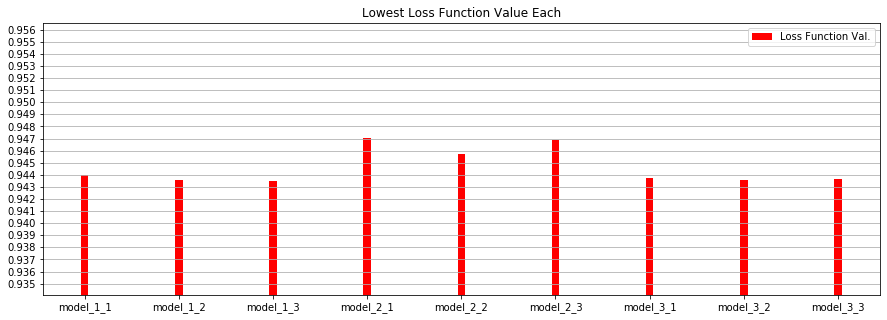

In [27]:
# Print out visualization of lowest loss for each model to compare
plt.figure(figsize=(15, 5))


# Do the additional bar plot
plt.bar(df_loss[['model_name']].values.squeeze(), df_loss[['min_loss']].values.squeeze(), 
       width=0.08,
       color='r')

plt.title('Lowest Loss Function Value Each')
plt.grid(axis='y')
plt.legend(['Loss Function Val.'])

########
# To plot the output more clearly fix the range of y axis and ticks dense
min_loss_min = float(df_loss[['min_loss']].min())
min_loss_max = float(df_loss[['min_loss']].max())

lower = 0.99 * min_loss_min
upper = 1.01 * min_loss_max

out = min_loss_max - min_loss_min
if out > 0.1:
    ticks_dense = 0.1
elif out > 0.01:
    ticks_dense = 0.01
elif out > 0.001:
    ticks_dense = 0.001
else:
    ticks_dense = 0.0001
########

plt.yticks(np.arange(0, upper, ticks_dense))

plt.ylim(lower, upper)

plt.show()

---

# LOSS FUNCTION ANALYSIS


### Loss function analysis
- [x] __compare all__
- [ ] plot the one that corresponds to best performance

## Model with the best loss history (the lowest loss value reached)

[]

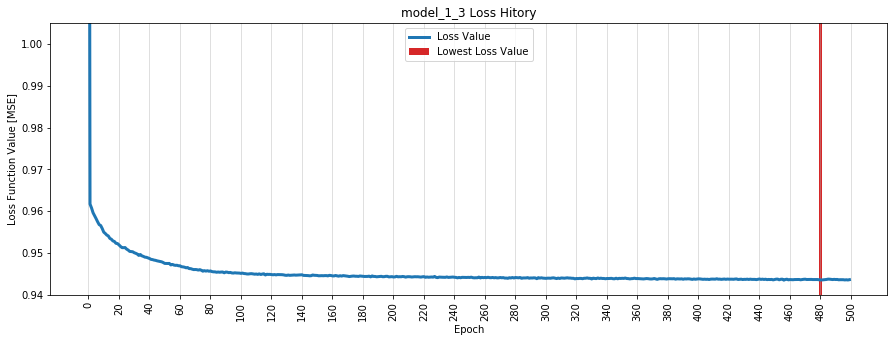

In [28]:
x = int(df_loss[['min_loss']].idxmin())

best_model_name = list(df_loss[['model_name']].loc[x].values)
best_model_name = str(best_model_name[0])



plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(MODELS[best_model_name][1]), lw=3, color='tab:blue')
plt.bar(x=480, height=1.1, color='tab:red', width=2)

title = str(best_model_name) + " Loss Hitory"

plt.title(title)
plt.xticks(np.arange(0, 510, 20), rotation=90, )
plt.grid(axis='x', alpha=0.5)
plt.ylabel('Loss Function Value [MSE]')
plt.xlabel('Epoch')
plt.ylim(0.94, 1.005)
plt.legend(['Loss Value', 'Lowest Loss Value'])
plt.plot()

---

# LOSS FUNCTION ANALYSIS


### Loss function analysis
- [x] __compare all__
- [x] __plot the one that corresponds to best performance__

---

---

# 1-session prediction analysis:

### 1-session prediction analysis:
- [ ] one 1-session prediction
- [ ] n 1-session predictions

---

In [29]:
# Nromalized
# 1 day forwoard prediction for each of models

n_input = 20
predictions = {}
for index, name in enumerate(MODELS):
    y_hat = MODELS[name][0].predict(train_norm[-n_input:].values.reshape((1, n_input))).squeeze().tolist()
    predictions[NAMES[index]] = y_hat

# Transformed to real values
# Real value predictions for 1 day forward
true_predictions = {}
for name in predictions:
    true = scaler.inverse_transform([[predictions[name]]]).squeeze().tolist()
    true_predictions[name] = true
    

'''
We have:
predictions : NORMALIZED
true_predictions : REAL VALUES
'''
true_predictions

{'model_1_1': 145.4962217292487,
 'model_1_2': 145.8238657648574,
 'model_1_3': 145.5957070622163,
 'model_2_1': 143.76723748522548,
 'model_2_2': 143.7611520200314,
 'model_2_3': 143.31936389411072,
 'model_3_1': 143.97568778919094,
 'model_3_2': 145.65306580862003,
 'model_3_3': 144.5642114633931}

In [30]:
# Actual value for 'tomorrow'
y_1 = float(test[0])
print(f'Actual value for tomorrow: {round(y_1, 2)} USD')

Actual value for tomorrow: 143.68 USD


In [31]:
# Error = y_hat - y
errors = {}
for name in true_predictions:
    errors[name] = true_predictions[name] - y_1
    
# Get rid of relative measures
abs_errors = {}
for name in true_predictions:
    abs_errors[name] = abs(true_predictions[name] - y_1)

In [32]:
# Sort Absolute Error to find out the best and the worst player
sorted_abs_errors = sorted(abs_errors.items(), key=lambda kv: kv[1])
sorted_abs_errors = dict(sorted_abs_errors)
sorted_abs_errors

{'model_2_2': 0.08115934425015325,
 'model_2_1': 0.08724480944422908,
 'model_3_1': 0.29569511340969257,
 'model_2_3': 0.3606287816705276,
 'model_3_3': 0.884218787611843,
 'model_1_1': 1.8162290534674526,
 'model_1_3': 1.9157143864350417,
 'model_3_2': 1.9730731328387776,
 'model_1_2': 2.143873089076152}

<BarContainer object of 9 artists>

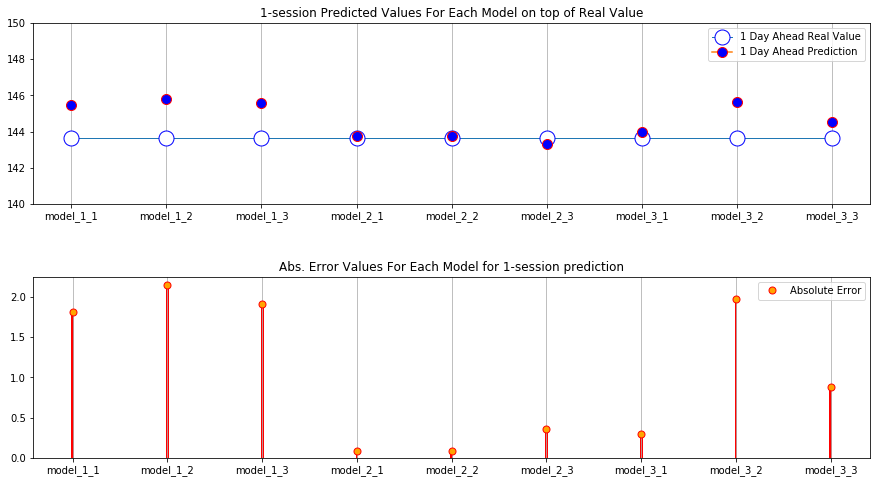

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(15, 8))
fig.subplots_adjust(hspace=0.4)

# Do the list of real value times as much as model we have
Y = []
for i in range(len(NAMES)):
    Y.append(y_1)

# Get the abs_errors values
y_ax2 = list(abs_errors.values())
x_ax2 = list(abs_errors.keys())

# Plot the prediction od each model
ax1.plot(NAMES, Y,
         marker='o',
         markersize=15,
         markerfacecolor='white',
         markeredgecolor='blue',
         lw=1,
         ls='-')

for name in true_predictions:
    y_hat = true_predictions[name]
    x = name
    
    ax1.plot(x, y_hat,
             marker='o',
             markersize=10,
             markerfacecolor='blue',
             markeredgecolor='red')

ax1.title.set_text('1-session Predicted Values For Each Model on top of Real Value')
ax1.grid(axis='x')
ax1.legend(['1 Day Ahead Real Value', '1 Day Ahead Prediction'])
ax1.set_ylim(140, 150)

# Plot absolute errors
ax2.plot(x_ax2, y_ax2, marker='o', markersize=7, ls='',
         markerfacecolor='orange',
         markeredgecolor='red')
ax2.title.set_text('Abs. Error Values For Each Model for 1-session prediction')
ax2.grid(axis='x')
ax2.legend(['Absolute Error'])

# Do the additional bar plot
ax2.bar(np.arange(len(x_ax2)), y_ax2, 
       width=0.03,
       color='r')
#ax2.xticks(np.arange(len(x_ax2)), (x_ax2))

---

# 1-session prediction analysis:

### 1-session prediction analysis:
- [x] __one 1-session prediction__
- [ ] n 1-session predictions

In [34]:
# 1 day ahead prediction for each of models

''''''''''''''''''''
# How many 1-day predictions do you need
n = 40

''''''''''''''''''''

df_1d_preds = pd.DataFrame(columns=(range(n)))
n_input = 20

for index, nam in enumerate(MODELS):
    model = MODELS[nam][0]
    name = NAMES[index]
    
    actual_values = []
    predicted_values = [] # n x 1-day prediction
    
    errors_list = []
    errors_dict = {}
    
    first_batch = train_norm[-n_input:].values.reshape((1, n_input))
    
    # Do n times 1-day prediction
    for turn in range(n):
        # Normalized predicted value for today
        y_hat_norm = model.predict(first_batch).squeeze().tolist()
        # Normalized true value for today
        y_norm = test_norm[turn]       
        
        # Inverse normalization for both
        y_hat = scaler.inverse_transform([[y_hat_norm]]).squeeze().tolist()
        y = scaler.inverse_transform([[y_norm]]).squeeze().tolist()
        
        # Count the error value
        errors_list.append(y_hat - y)
        
        # Predictions
        predicted_values.append(y_hat)
        # Real values
        actual_values.append(y)
        
        
        
        next_batch = np.append(first_batch, y_norm)[1:].reshape((1, n_input))
        first_batch = next_batch 

    df_1d_preds.loc[name] = predicted_values
    errors_dict[name] = errors_list

#### NAIVE PREDICTIONS
t_minus_1 = train_norm[-1:].values[0]
naive = []
for i in range(n):
    
    t = test_norm[i]
    t_plus_1 = t + (t - t_minus_1)
    naive.append(scaler.inverse_transform([[t_plus_1]]).squeeze().tolist())
    
    t_minus_1 = test_norm[i]
    
    
#### SMA PREDICTIONS
train_test_148 = np.append(train[-n_input:], test) #len: 148 = 20 + 128
df_train_test_148 = pd.DataFrame(train_test_148)
df_train_test_148['SMA_20'] = df_train_test_148.rolling(window=20).mean()
    
    
    
df_1d_preds.loc['Actual Values'] = actual_values

df_1d_preds.loc['Naive Predictions'] = naive

df_1d_preds.loc['SMA_20'] = df_train_test_148['SMA_20'].dropna().iloc[:n].values





########################################


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAE_list = []
MAPE_list = []
MSE_list = []
#R2_list = []
mean_list = []
std_list = []


# !!! Cannot be transposed. Stucture suppose to be like (0-n) as columns and models as index
for name in list(df_1d_preds.index):
    y_hat = list(df_1d_preds.loc[name])
    y = list(df_1d_preds.loc['Actual Values'])
    
    MAE_list.append(mean_absolute_error(y, y_hat))
    MAPE_list.append(mean_absolute_percentage_error(y, y_hat))
    MSE_list.append(mean_squared_error(y, y_hat))
#    R2_list.append(r2_score(y, y_hat))
    mean_list.append(np.mean(y_hat))
    std_list.append(np.std(y_hat))

# Transpose
df_1d_preds = df_1d_preds.transpose()

df_1d_preds.loc['MAE_1'] = MAE_list
df_1d_preds.loc['MAPE_1'] = MAPE_list
#df_1d_preds.loc['MSE_1'] = MSE_list
df_1d_preds.loc['RMSE_1'] = np.sqrt(MSE_list)
#df_1d_preds.loc['R2'] = R2_list
df_1d_preds.loc['Mean_1'] = mean_list
df_1d_preds.loc['Std_1'] = std_list



########################################
# Split the database into 
df_1d_preds_full = df_1d_preds.copy()
df_1d_preds_evaluation = df_1d_preds[n:].copy()
df_1d_preds = df_1d_preds[:n].copy()


# Uncomment below to see full dataframe of predictions
#df_1d_preds_full

In [35]:
df_1d_preds_evaluation

,model_1_1,model_1_2,model_1_3,model_2_1,model_2_2,model_2_3,model_3_1,model_3_2,model_3_3,Actual Values,Naive Predictions,SMA_20
MAE_1,1.357769,1.573945,1.482956,2.333516,2.388735,2.513182,1.872955,1.450672,1.545059,0.00000,1.432000,4.178326
MAPE_1,0.881933,1.026922,0.965531,1.512104,1.548537,1.634736,1.212220,0.941196,1.001185,0.00000,0.931483,2.711159
RMSE_1,1.961463,2.057720,2.036436,2.827337,2.852845,2.996391,2.362995,1.967957,2.087697,0.00000,1.997227,4.799065
Mean_1,152.297354,151.870587,152.160413,150.774163,150.564094,150.280796,150.993064,151.779893,151.608210,152.48975,152.825750,149.275600
Std_1,5.911487,5.889121,5.855412,5.549474,5.578064,5.620204,5.481779,5.589466,5.667771,5.91365,6.548029,3.900879


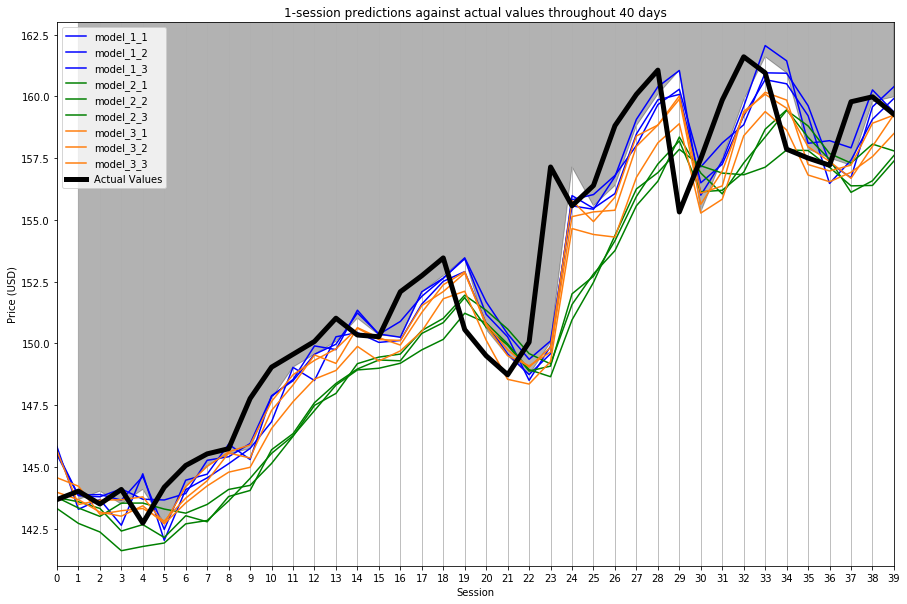

In [36]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())
colors = ['blue', 'green', 'tab:orange'] #'tab:purple'

plt.figure(figsize=(15, 10))
plt.autoscale(tight=True, axis='x')
j=0




if True:
    col_names = list(np.append(NAMES, 'Actual Values').squeeze())
    #df_1d_preds = df_1d_preds[col_names]
    
    for i in range(9):
        col = colors[j]
        #plt.plot(df_1d_preds[df_1d_preds.columns[:-1]], lw=2)
        plt.plot(df_1d_preds[col_names][df_1d_preds[col_names].columns[i]], lw=1.5, color=col)
        if (i+1)%3==0:
            j+=1


    # Thats weird that real values regression line fit way better once they're shifted by one step ahead.
    plt.plot(df_1d_preds[col_names][df_1d_preds[col_names].columns[-1:]], lw=5, color='black')

    plt.fill_between(x=np.arange(n),
                     y1=df_1d_preds[col_names][df_1d_preds[col_names].columns[-1:]].shift(1).values.squeeze(),
                     y2=180,
                     alpha=0.3,
                     color='black')


    plt.legend(df_1d_preds[col_names].columns)
    plt.ylim(141, 163)
    plt.xticks(np.arange(n))
    plt.grid(axis='x')
    plt.title('1-session predictions against actual values throughout 40 days')
    plt.xlabel('Session')
    plt.ylabel('Price (USD)')
    plt.plot()

In [37]:
# Point the best model with lowest average errors
check = df_1d_preds_evaluation[NAMES][:3].copy()
check = check.transpose()
print(f'Lowest errors for:\n{check.idxmin()} \n\n\nHow often models show up:\n{check.idxmin().value_counts()} \n\n\nBEST MODEL: {check.idxmin().value_counts().idxmax()}')

best_model_name = check.idxmin().value_counts().idxmax()

Lowest errors for:
MAE_1     model_1_1
MAPE_1    model_1_1
RMSE_1    model_1_1
dtype: object 


How often models show up:
model_1_1    3
dtype: int64 


BEST MODEL: model_1_1


[]

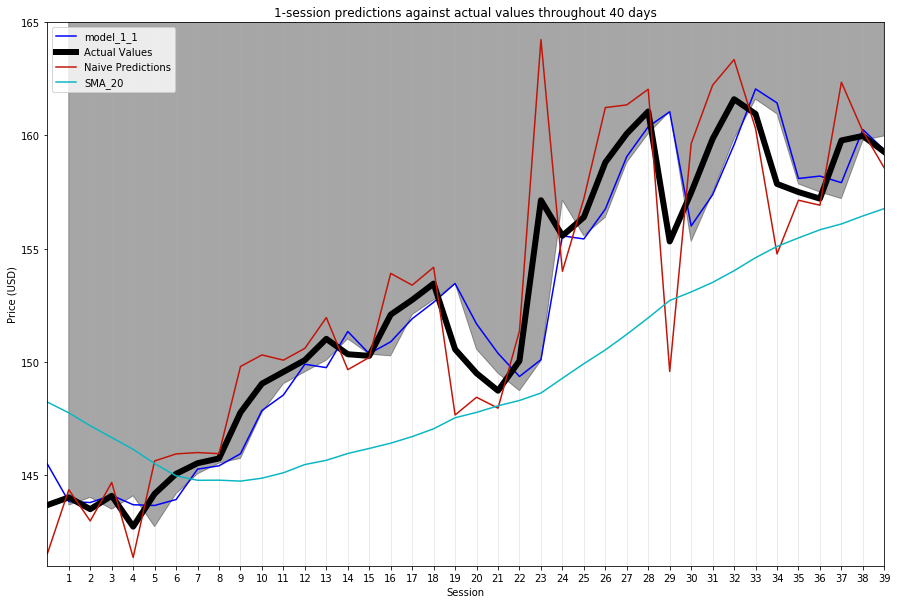

In [38]:
#n = same as above

import seaborn as sns

current_palette = sns.color_palette()
current_palette = sns.hls_palette(2, l=.4, s=.9)

colors = ['blue', 'green', 'tab:orange']

plt.figure(figsize=(15, 10))
plt.autoscale(tight=True, axis='x')
j=0
for i in range(1):
    col = colors[j]
    #plt.plot(df_1d_preds[df_1d_preds.columns[:-1]], lw=2)
    plt.plot(df_1d_preds[['model_1_1']], lw=1.5, color=col)
    if (i+1)%3==0:
        j+=1

    
# Thats weird that real values regression line fit way better once they're shifted by one step ahead.
plt.plot(df_1d_preds[['Actual Values']], lw=6, color='black')

plt.fill_between(x=np.arange(n),
                 y1=df_1d_preds[['Actual Values']].shift(1).values.squeeze(),
                 y2=180,
                 lw=1,
                 alpha=0.35,
                 color='black')


plt.plot(df_1d_preds[['Naive Predictions']], lw=1.5, color=current_palette[0])
plt.plot(df_1d_preds[['SMA_20']], lw=1.5, color=current_palette[1])


plt.legend(['model_1_1', 'Actual Values', 'Naive Predictions', 'SMA_20'])
plt.ylim(141, 165)
plt.xticks(np.arange(1, n+1, 1))
plt.grid(axis='x', alpha=-.7)
plt.title('1-session predictions against actual values throughout 40 days')
plt.xlabel('Session')
plt.ylabel('Price (USD)')
plt.plot()

### * Grey plane over the ```Actual Values``` curve explanation needed

### Errors from above plot:

In [39]:
# Best model against the oter prediction techniques
df_1d_preds_evaluation[[best_model_name, 'Naive Predictions', 'SMA_20', 'Actual Values']]

,model_1_1,Naive Predictions,SMA_20,Actual Values
MAE_1,1.357769,1.432000,4.178326,0.00000
MAPE_1,0.881933,0.931483,2.711159,0.00000
RMSE_1,1.961463,1.997227,4.799065,0.00000
Mean_1,152.297354,152.825750,149.275600,152.48975
Std_1,5.911487,6.548029,3.900879,5.91365


---

# 1-session prediction analysis:

### 1-session prediction analysis:
- [x] __one 1-session prediction__
- [x] __n 1-session predictions__

---

---

# 20-session prediction analysis:

### 20-session prediction analysis:
- [ ] one 20-sessions prediction
- [ ] n 20-sessions predictions

---

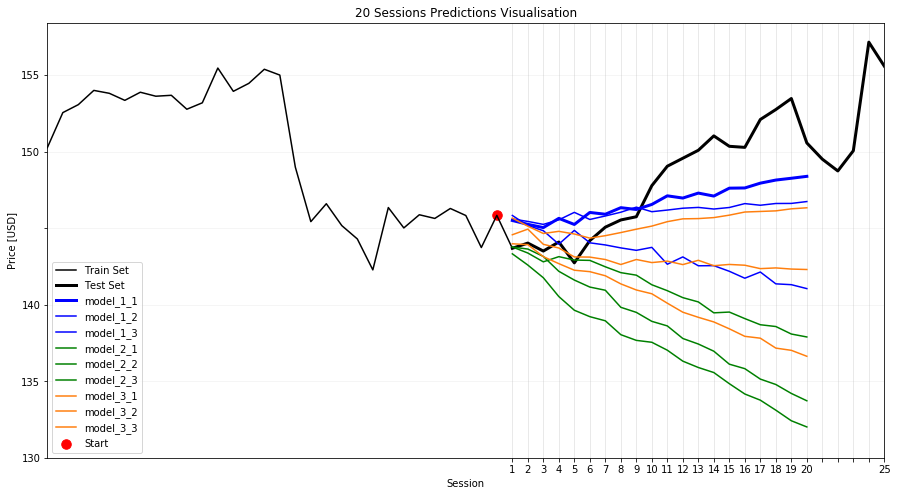

In [40]:
n_input = 20
predictions_20 = {}

for index, model in enumerate(MODELS):
    model = MODELS[model][0]
    name = NAMES[index]
    preds_20 = []

    # Initialize prediction process using very last 20 values within train set, in order to predict first 'future' value.
    # Tricky thing is that we actualyy know that future value, since we approximate not further than length of the test set.

    first_batch = train_norm[-n_input:].values.reshape((1, n_input)) # numpy.ndarray (1, 20)

    # Predict 20 sessions ahead
    # Note that later prediction will base on previous predictions what makes further outputs more noisy 
    for i in range(20):
        y_hat = model.predict(first_batch).squeeze() # numpy.ndarray ()
        preds_20.append(y_hat.tolist())

        next_batch = np.append(first_batch, y_hat)[1:].reshape((1, n_input)) # numpy.ndarray (1, 20)
        first_batch = next_batch
    
    predictions_20[name] = preds_20
    

# Transformed to real values
# Real value predictions for 20 days forward
true_predictions_20 = {}
for name in predictions_20:
    values_norm = predictions_20[name]
    values = list(scaler.inverse_transform([values_norm]).squeeze())
    
    true_predictions_20[name] = values
    
import matplotlib.colors as mcolors
colors = ['blue', 'green', 'tab:orange']

different_models = int(len(MODELS)/3)
different_models

different_models = int(len(MODELS)/3)

legend = list(np.append(['Train Set', 'Test Set'], list(true_predictions_20.keys())))
legend = list(np.append(legend, 'Start'))

x = np.arange(0, 20)

# For train part
x1 = np.arange(-30, 1)

plt.figure(figsize=(15, 8))
plt.autoscale(tight=True, axis='x')

# Plot train set part
plt.plot(x1, np.append(train[-len(x1)+1:], test[:1]),
         color='black',
         alpha=1,
         ls='-',
         lw=1.5)


plt.scatter(-1, train[-1:], 90, color='red', label='start')


# Plot test set corresponded to predictions
plt.plot(np.arange(0, 25), test[:25],
         color='black',
         lw=3)



# Plot predictions
ii = 0
jj = 0
for index, key in enumerate(list(true_predictions_20.keys())):
    if key == 'model_1_1':
        plt.plot(x, true_predictions_20[key],
                 marker='',
                 markersize=5,
                 mfc='yellow',
                 lw=3,
                 color=colors[ii])
    else:
        plt.plot(x, true_predictions_20[key],
             marker='',
             markersize=4,
             lw=1.5,
             color=colors[ii])
    if jj >= different_models-1:
        jj = -1
        ii += 1
    jj += 1
    

    
    
plt.legend(legend)
#plt.legend(legend, loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.4))
plt.grid(axis='x', alpha=0.35)
plt.grid(axis='y', alpha=0.15)
plt.xticks(np.arange(0, 25, 1), np.append(np.arange(1, 21, 1), ['','','','',25]))
plt.yticks(np.arange(130, 160, 5), labels=[130, '135', 140, '', 150, '155'])
plt.title('20 Sessions Predictions Visualisation')
plt.xlabel('Session')
plt.ylabel('Price [USD]')
plt.show()

In [41]:
train_test_norm = np.append(train_norm[-20:], test_norm).squeeze()



from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

ME_20_beta = {}
MAE_20_beta = {}
MSE_20_beta = {}
RMSE_20_beta = {}
MAPE_20_beta = {}
Mean_20_beta = {}
Std_20_beta = {}

preds_20_full = {}


# How many predictions do you want?
n_turn = 1


for turn in range(n_turn):
    
    for index, model in enumerate(MODELS):
        model = MODELS[model][0]
        name = NAMES[index]
        preds_20_norm = []

        
        first_batch = train_test_norm[0+turn : 20+turn].reshape((1, n_input))
        
        real_values_norm = train_test_norm[0+20+turn : 20+20+turn].reshape((1, n_input)).squeeze()
        real_values = scaler.inverse_transform([real_values_norm]).squeeze()
        
        for i in range(20):
            y_hat = model.predict(first_batch).squeeze() # numpy.ndarray ()
            preds_20_norm.append(y_hat.tolist())
   
            next_batch = np.append(first_batch, y_hat)[1:].reshape((1, n_input)) # numpy.ndarray (1, 20)
            first_batch = next_batch
        
        preds_20 = scaler.inverse_transform([preds_20_norm]).squeeze()
        preds_20_full[name] = preds_20
        
        
        errors = list(np.subtract(preds_20, real_values))

        ME = np.mean(errors)
        MAE = mean_absolute_error(real_values, preds_20)
        MAPE = mean_absolute_percentage_error(real_values, preds_20)
        MSE = mean_squared_error(real_values, preds_20)
        RMSE = np.sqrt(MSE)
        Mean = np.mean(preds_20)
        Std = np.std(preds_20)

        
        if turn ==0:
            ME_20_beta[name] = ME
            MAE_20_beta[name] = MAE
            MAPE_20_beta[name] = MAPE
            MSE_20_beta[name] = MSE
            RMSE_20_beta[name] = RMSE
            Mean_20_beta[name] = Mean
            Std_20_beta[name] = Std
        else:
            ME_20_beta[name] = np.append(ME_20_beta[name], ME)           
            MAE_20_beta[name] = np.append(MAE_20_beta[name], MAE)
            MAPE_20_beta[name] = np.append(MAPE_20_beta[name], MAPE)
            MSE_20_beta[name] = np.append(MSE_20_beta[name], MSE)
            RMSE_20_beta[name] = np.append(RMSE_20_beta[name], RMSE)
            Mean_20_beta[name] = np.append(Mean_20_beta[name], Mean)
            Std_20_beta[name] = np.append(Std_20_beta[name], Std)
            

ME_20 = []
MAE_20 = []
MSE_20 = []
RMSE_20 = []
MAPE_20 = []
Mean_20 = []
Std_20 = []


df_20_total_errors = pd.DataFrame(columns = MODELS.keys())

for name in MODELS:
    ME_20.append(np.mean(ME_20_beta[name]))
    MAE_20.append(np.mean(MAE_20_beta[name]))
    MSE_20.append(np.mean(MSE_20_beta[name]))
    RMSE_20.append(np.mean(RMSE_20_beta[name]))
    MAPE_20.append(np.mean(MAPE_20_beta[name]))
    Mean_20.append(np.mean(Mean_20_beta[name]))
    Std_20.append(np.mean(Std_20_beta[name]))


    
    
df_20_total_errors.loc['ME_20'] = ME_20
df_20_total_errors.loc['MAE_20'] = MAE_20
df_20_total_errors.loc['MSE_20'] = MSE_20
df_20_total_errors.loc['RMSE_20'] = RMSE_20
df_20_total_errors.loc['MAPE_20'] = MAPE_20
df_20_total_errors.loc['Mean_20'] = Mean_20
df_20_total_errors.loc['Std_20'] = Std_20

# Uncomment to plot the predictions
'''
if n_turn ==1:
    plt.figure(figsize=(15, 10))
    for name in MODELS:
        model = MODELS[name][0]

        plt.plot(np.arange(0, 20), preds_20_full[name])

    plt.plot(np.arange(0, 20), real_values, color='black', lw=5)

df_20_total_errors['Real Values'] = [0, 0, 0, 0, 0,
                                     np.mean(train_test_148[20:40+n_turn]),
                                     np.std(train_test_148[20:40+n_turn])]'''

df_20_total_errors

,model_1_1,model_1_2,model_1_3,model_2_1,model_2_2,model_2_3,model_3_1,model_3_2,model_3_3
ME_20,-1.071678,-4.566326,-1.667630,-6.797608,-9.011854,-10.555478,-7.490906,-2.400695,-4.768581
MAE_20,2.330188,5.240122,2.973624,6.824500,9.019970,10.555478,7.520476,3.097510,5.030728
MSE_20,7.044145,42.782845,12.161285,73.922811,123.076643,154.135820,87.980919,14.195835,38.606414
RMSE_20,2.654081,6.540860,3.487303,8.597838,11.093991,12.415145,9.379814,3.767736,6.213406
MAPE_20,1.562362,3.488638,1.989476,4.539175,6.007164,7.046321,5.004735,2.065772,3.349193
Mean_20,146.701321,143.206673,146.105370,140.975391,138.761146,137.217521,140.282093,145.372305,143.004419
Std_20,1.056454,1.336101,0.431314,1.886533,3.135216,3.245281,2.293079,0.622593,0.715442


In [42]:
prediction_20_rolling_avg = []
prediction_20_rolling_std = []
n = 20

# Initialize prediction process using very last 20 values within train set, in order to predict first 'future' value.
# Tricky thing is that we actualyy know that future value, since we approximate not further than length of the test set.

first_batch = train[-n_input:].squeeze()

# Predict 20 sessions ahead
# Note that later prediction will base on previous predictions what makes further outputs more noisy 
for i in range(n):
    pred_20_avg = np.mean(first_batch)
    prediction_20_rolling_avg.append(pred_20_avg)
    
    pred_20_std = np.std(first_batch)
    prediction_20_rolling_std.append(pred_20_std)

    next_batch = np.append(first_batch, pred_20_avg)[1:]
    first_batch = next_batch

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

####################################

R2_20_list = []
MAE_20_list = []
MSE_20_list = []
MAPE_20_list = []
ME_20_list = []

y_test = test[:20].squeeze()


for name in true_predictions_20:
    R2_20_list.append(r2_score(y_test, true_predictions_20[name]))
    MAE_20_list.append(mean_absolute_error(y_test, true_predictions_20[name]))
    MSE_20_list.append(mean_squared_error(y_test, true_predictions_20[name]))
    MAPE_20_list.append(mean_absolute_percentage_error(y_test, true_predictions_20[name]))
    ME_20_list.append(np.mean(np.subtract(true_predictions_20[name], y_test)))

metrics = [R2_20_list, MAE_20_list, MSE_20_list]



evaluation = pd.DataFrame(data=np.zeros(len(NAMES)), index=NAMES).drop([0], axis=1)
evaluation['ME_20'] = ME_20_list
evaluation['MAE_20'] = MAE_20_list 
#evaluation['MSE_20'] = MSE_20_list
evaluation['RMSE_20'] = np.sqrt(MSE_20_list)
evaluation['MAPE_20'] = MAPE_20_list
#evaluation['R2_20'] = R2_20_list


mse_20_roll_avg = mean_squared_error(y_test, prediction_20_rolling_avg)
rmse_20_roll_avg = np.sqrt(mse_20_roll_avg)
mae_20_roll_avg = mean_absolute_error(y_test, prediction_20_rolling_avg)
r2_20_roll_avg = r2_score(y_test, prediction_20_rolling_avg)
mape_20_roll_avg = mean_absolute_percentage_error(y_test, prediction_20_rolling_avg)
me_20_roll_avg = np.mean(np.subtract(prediction_20_rolling_avg, y_test))

#evaluation.loc['rolling_mean'] = [mse_20_roll_avg, rmse_20_roll_avg, mae_20_roll_avg, r2_20_roll_avg]
evaluation.loc['rolling_mean'] = [me_20_roll_avg, mae_20_roll_avg, rmse_20_roll_avg, mape_20_roll_avg]


evaluation.transpose()

,model_1_1,model_1_2,model_1_3,model_2_1,model_2_2,model_2_3,model_3_1,model_3_2,model_3_3,rolling_mean
ME_20,-1.071678,-4.566326,-1.667630,-6.797608,-9.011854,-10.555478,-7.490906,-2.400695,-4.768581,-1.204935
MAE_20,2.330188,5.240122,2.973624,6.824500,9.019970,10.555478,7.520476,3.097510,5.030728,3.608352
RMSE_20,2.654081,6.540860,3.487303,8.597838,11.093991,12.415145,9.379814,3.767736,6.213406,4.008830
MAPE_20,1.562362,3.488638,1.989476,4.539175,6.007164,7.046321,5.004735,2.065772,3.349193,2.428403


[]

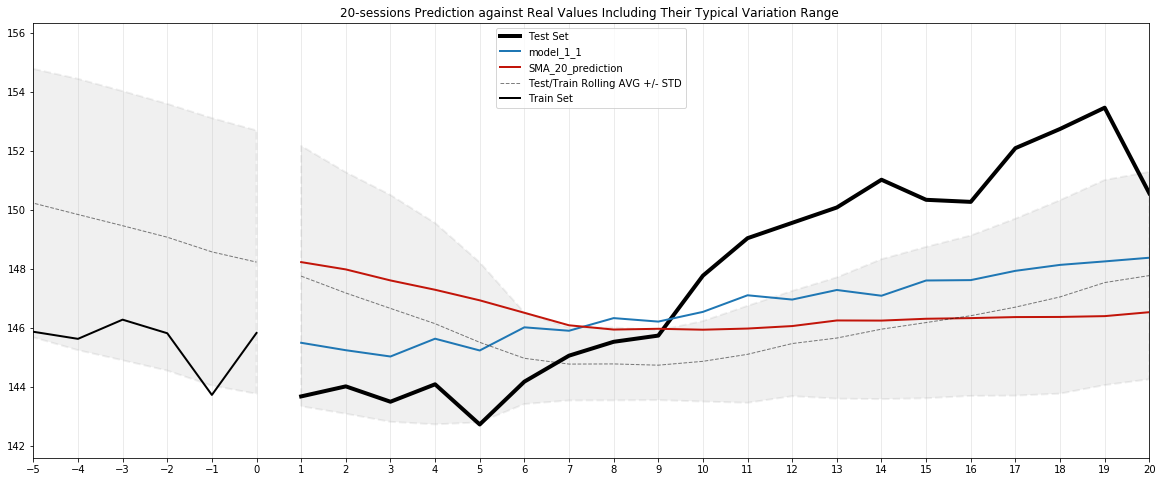

In [44]:
# Prediction of 20 sessions ahead
# It is rolling average with 20 days span
# Further predictions base on previous
data = np.append(train[-19:].squeeze(), test[:20].squeeze())
dataset = pd.DataFrame(data)
x = np.arange(1, 21)

rolling_20_avg = dataset.rolling(window=20).mean()
rolling_20_avg.dropna(inplace=True)
#rolling_20_avg.reset_index(drop=True, inplace=True)
rolling_20_avg = np.array(rolling_20_avg).squeeze()

rolling_20_std = dataset.rolling(window=20).std()
rolling_20_std.dropna(inplace=True)
#rolling_20_std.reset_index(drop=True, inplace=True)
rolling_20_std = np.array(rolling_20_std).squeeze()

upper_bound_rolling_std = np.add(rolling_20_avg, rolling_20_std)
lower_bound_rolling_std = np.subtract(rolling_20_avg, rolling_20_std)









##################################

train_SMA = pd.DataFrame(train[-40:]).rolling(window=20).mean().dropna()
train_roll_std = pd.DataFrame(train[-40:]).rolling(window=20).std().dropna()
train_lower = (train_SMA-train_roll_std).values.squeeze()
train_upper = (train_SMA+train_roll_std).values.squeeze()

######################################


x = np.arange(1, 21)
name = evaluation['RMSE_20'].idxmin()

plt.figure(figsize=(20, 8))
plt.plot(x, test[:20],
         color='black',
         lw=4)

plt.plot(x, true_predictions_20[name],
         color='tab:blue',
         lw=2)

plt.plot(x, prediction_20_rolling_avg,
         lw=2,
         color=current_palette[0])

plt.fill_between(x, upper_bound_rolling_std, lower_bound_rolling_std,
                 alpha=0.06,
                 color='black',
                 ls='--',
                 lw=2)
plt.plot(x, rolling_20_avg,
         ls='--',
         lw=1,
         color='black',
         alpha=0.5)



train_roll = pd.DataFrame(train[-40:]).rolling(window=20).mean()





plt.plot(np.arange(-19, 1), train[-20:], color='black', lw=2)
plt.fill_between(np.arange(-20, 1), train_lower, train_upper,alpha=0.06,color='black',ls='--',lw=2)

plt.plot(np.arange(-20, 1), train_SMA,
         ls='--',
         lw=1,
         color='black',
         alpha=0.5)


plt.legend(['Test Set', 'model_1_1', 'SMA_20_prediction', 'Test/Train Rolling AVG +/- STD', 'Train Set'],
           loc="upper center")
plt.autoscale(tight=True, axis='x')
plt.xticks(np.arange(-20, 21))
plt.grid(axis='x', alpha=0.3)
plt.xlim(-5, 20)
plt.title('20-sessions Prediction against Real Values Including Their Typical Variation Range ')


'''
Plot of best model's performance, comparing to simple moving average (SMA).
Plot includes 20-days rolling average of train +/- its standard deviation that represents it's typical variation range.
'''

plt.plot()

In [45]:
test_avg = np.mean(test[:20])
test_std = np.std(test[:20])

print(f'-----------------------------------------------------\n\
TEST SET (first 20 observations):\n\nAverage Value (AVG, MEAN): {round(test_avg, 4)},\nwith Standard deviation (STD): {round(test_std, 4)}.\n\
-----------------------------------------------------')

-----------------------------------------------------
TEST SET (first 20 observations):

Average Value (AVG, MEAN): 147.773,
with Standard deviation (STD): 3.4237.
-----------------------------------------------------


---

# 20-session prediction analysis:

### 20-session prediction analysis:
- [x] __one 20-sessions prediction__
- [ ] n 20-sessions predictions

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

n_input = 20
predictions_20 = {}



################################

# How many 20-days predictions you want to analyse
n = 40


################################


train_test_norm = np.append(train_norm[-n_input:], test_norm) #len: 148 = 20 + 128
train_test_norm
RMSE_20_dict = {}
MAE_20_dict = {}
MAPE_20_dict = {}
ME_20_dict = {}

for j in range(n):

    for index, model in enumerate(MODELS):
        model = MODELS[model][0]
        name = NAMES[index]
        preds_20_norm = []

        # Initialize prediction process using very last 20 values within train set, in order to predict first 'future' value.
        # Tricky thing is that we actualyy know that future value, since we approximate not further than length of the test set.

        first_batch = train_test_norm[j:20+j].reshape((1, n_input)) # numpy.ndarray (1, 20)
        reals_norm = train_test_norm[20+j:20+j+20]
        
        # Predict 20 sessions ahead
        # Note that later prediction will base on previous predictions what makes further outputs more noisy 
        for i in range(20):
            y_hat = model.predict(first_batch).squeeze() # numpy.ndarray ()
            preds_20_norm.append(y_hat.tolist())

            next_batch = np.append(first_batch, y_hat)[1:].reshape((1, n_input)) # numpy.ndarray (1, 20)
            first_batch = next_batch
        
        
        
        preds_20 = scaler.inverse_transform([preds_20_norm]).squeeze()
        
        predictions_20[name] = preds_20
        
        
        reals = scaler.inverse_transform([reals_norm]).squeeze()
        preds_20 = scaler.inverse_transform([preds_20_norm]).squeeze()

        
        ME_20 = np.mean(np.subtract(preds_20, reals))
        MSE_20 = mean_squared_error(reals, preds_20)
        RMSE_20 = np.sqrt(MSE_20)
        MAPE_20 = mean_absolute_percentage_error(reals, preds_20)
        MAE_20 = mean_absolute_error(reals, preds_20)
        
        if j == 0:
            RMSE_20_dict[name] = RMSE_20
            MAE_20_dict[name] = MAE_20
            MAPE_20_dict[name] = MAPE_20
            ME_20_dict[name] = ME_20
        else:
            RMSE_20_lista = list(np.append(RMSE_20_dict[name], RMSE_20).squeeze())
            RMSE_20_dict[name] = RMSE_20_lista
            
            MAE_20_lista = list(np.append(MAE_20_dict[name], MAE_20).squeeze())
            MAE_20_dict[name] = MAE_20_lista
            
            MAPE_20_lista = list(np.append(MAPE_20_dict[name], MAPE_20).squeeze())
            MAPE_20_dict[name] = MAPE_20_lista
            
            ME_20_lista = list(np.append(ME_20_dict[name], ME_20).squeeze())
            ME_20_dict[name] = ME_20_lista

df_20d_preds = pd.DataFrame(columns=['ME_20', 'MAE_20', 'RMSE_20', 'MAPE_20'])            

for index, model in enumerate(MODELS):
    model = MODELS[model][0]
    name = NAMES[index]
            
    df_20d_preds.loc[name] = [np.mean(ME_20_dict[name]), np.mean(MAE_20_dict[name]), np.mean(RMSE_20_dict[name]), np.mean(MAPE_20_dict[name])]
    
df_20d_preds = df_20d_preds.transpose()

'''
Average of mean errors for n 20-days predictions for each model.
'''

df_20d_preds

,model_1_1,model_1_2,model_1_3,model_2_1,model_2_2,model_2_3,model_3_1,model_3_2,model_3_3
ME_20,-1.852234,-6.397569,-3.430177,-9.433626,-11.511711,-11.707941,-11.291983,-5.136537,-7.001502
MAE_20,3.263919,6.649052,4.133390,9.529556,11.570170,11.743708,11.327897,5.290613,7.133974
RMSE_20,3.805536,7.579296,4.782804,10.778049,13.057429,13.162985,12.684274,5.976994,8.057230
MAPE_20,2.083704,4.234974,2.634886,6.048415,7.348549,7.465544,7.182767,3.350670,4.523337


In [47]:
# Find out best model
for i in evaluation.columns:
    print(f'Lowest {i} => {(evaluation[[i]].idxmin().values)}')
    
# Compare best model predictions with rolling_mean predictions
evaluation.transpose()[['model_1_1', 'rolling_mean']]

Lowest ME_20 => ['model_2_3']
Lowest MAE_20 => ['model_1_1']
Lowest RMSE_20 => ['model_1_1']
Lowest MAPE_20 => ['model_1_1']


,model_1_1,rolling_mean
ME_20,-1.071678,-1.204935
MAE_20,2.330188,3.608352
RMSE_20,2.654081,4.008830
MAPE_20,1.562362,2.428403


---

# 20-session prediction analysis:

### 20-session prediction analysis:
- [x] __one 20-sessions prediction__
- [x] __n 20-sessions predictions__

---

### __** START of extra visualisation part **__


Best model's 20-days prediction against real values:



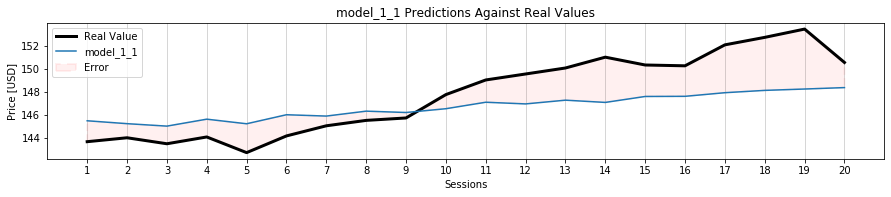

In [48]:
x = np.arange(1, 21)
name = evaluation['RMSE_20'].idxmin()

plt.figure(figsize=(15, 2.5))
plt.plot(x, test[:20],
         color='black',
         lw=3)

plt.plot(x, true_predictions_20[name],
         color='tab:blue',
         lw=1.5)


plt.fill_between(x, true_predictions_20[name], test[:20].squeeze(),
                 alpha=0.06,
                 color='red',
                 ls='--',
                 lw=2)


plt.legend(['Real Value', name, 'Error', 'Real Value Rolling AVG +/- STD'], loc=2)
plt.autoscale(tight=True, axis='x')
plt.xticks(x)
plt.xlim(0, 21)
#plt.grid(axis='y')
plt.grid(axis='x', color='black', alpha=0.2)
plt.xlabel("Sessions")
plt.ylabel('Price [USD]')
plt.title('model_1_1 Predictions Against Real Values')
plt.plot()

print('\nBest model\'s 20-days prediction against real values:\n')


Daily errors made by best model's 20-days prediction:



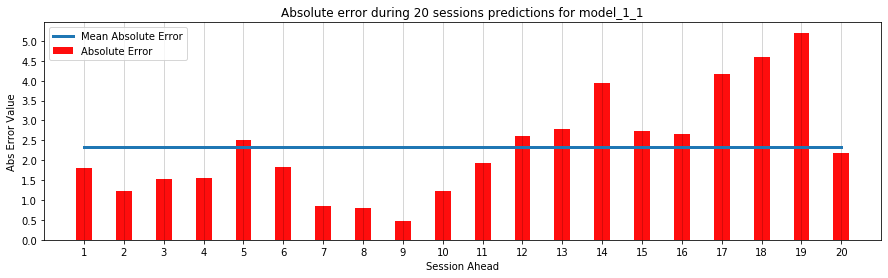

In [49]:
errors_20 = {}
for name in true_predictions_20:
    preds = true_predictions_20[name]
    errors_20[name] = np.subtract(preds, test[:20].squeeze())
    
    
plt.figure(figsize=(15, 4))
plots = []
n = len(NAMES)
x = np.arange(1, 21)


# Plot the data of assinged models
ii = 0
jj = 0
plt.bar(x, np.abs(errors_20['model_1_1']),
       width=0.4,
       color='red', alpha=0.95)
    
    
# Plot the average absolute error
y_mae = []
for i in range(len(x)):
    y_mae.append(np.mean(np.abs(errors_20['model_1_1'])))

    
plt.plot(x, y_mae,
        color='tab:blue',
        lw=3)

#plt.legend(['Mean Absolute Error', 'Absolute Error'], loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.legend(['Mean Absolute Error', 'Absolute Error'], loc=2)

#ax.grid(True, axis='y')
plt.xlabel('Session Ahead')
plt.ylabel('Abs Error Value')
plt.title('Absolute error during 20 sessions predictions for model_1_1')

plt.xlim(0, 21)
plt.yticks(np.arange(0, 6, 0.5))
plt.xticks(np.arange(1, 21, 1))
plt.grid(axis='x', color='black', alpha=0.2)
#plt.grid(axis='y', alpha=0.1)
plt.plot()

print('\nDaily errors made by best model\'s 20-days prediction:\n')

### __** END of extra visualisation part **__

---

# Simulation:

### Simulation:
- [ ] Based on best model's predictions simulation of traiding

---

--------------------------------------------------model_1_1-------
	START DATE: 2017-06-28 00:00:00.

	1) Wallet: $10000,
	2) buy 10 assets always and only -
	   while the predicted price chage is going to increase,
	3) assets owned: 0.

	STOP DATE: 2017-10-09 00:00:00.

	4) After 70 days, wallet change equals $118.40.
	5) Wallet afterall: $10118.40
	6) Assets left: 0.
------------------------------------------------------------------
	Accuracy over 70 days of trading equals 48.57%  (34/70)
------------------------------------------------------------------



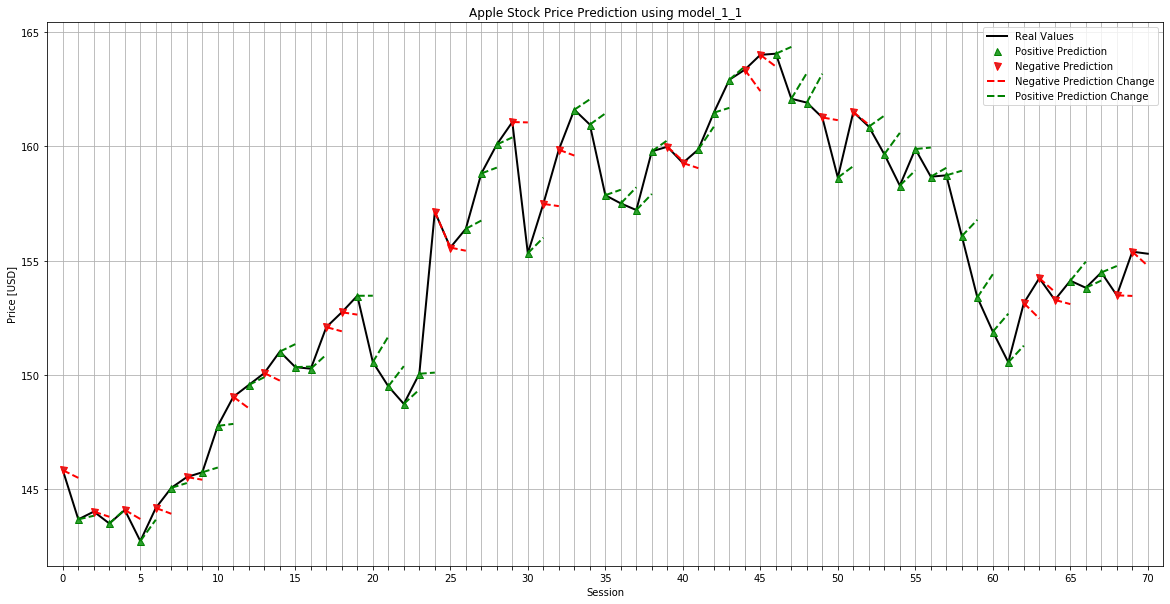

In [50]:
##########################################
##########################################
##########################################
##########################################

model = MODELS['model_1_1'][0]

n_days = 70 # How many days you want to trade

start = train_norm[-1:].index
stop = test_norm[n_days:n_days+1].index

##########################################
##########################################
##########################################
##########################################

decision_predicted = []
decision_real = []

##########################################

will_increase = []
will_decrease = []

##########################################

predictions_all = []
real_prices = []

##########################################

wallet_start = 10000 # Wllet value $$
wallet = wallet_start
n_assets = 10 # How many asstes to buy every transaction
assets_total = 0 # How many asstes do you have
assets_bought = 0

##########################################

first_batch = train_norm[-n_input:].values.reshape((1, n_input)) # Normalised

today_price_norm = train_norm[-1:].values # Normalised
today_price = scaler.inverse_transform([today_price_norm]).squeeze()

##########################################
# For plotting purposes
todays = []
todays.append(today_price)
##########################################
# Real prices cumulator
real_prices.append(today_price)

print(f'\
--------------------------------------------------model_1_1-------\n\
\tSTART DATE: {str(list(start)[0])}.\n\n\
\t1) Wallet: ${wallet},\n\
\t2) buy {n_assets} assets always and only -\n\
\t   while the predicted price chage is going to increase,\n\
\t3) assets owned: {assets_total}.\n')

for day in range(n_days):
    #print(f'\nDAY {day}: ')
    prediction_norm = model.predict(first_batch).squeeze().tolist() # Normalised
    prediction = scaler.inverse_transform([[prediction_norm]]).squeeze()
    
    predictions_all.append(prediction)
    
    
    if prediction > today_price:
        wallet -= today_price * n_assets
        assets_total += n_assets
        decision_predicted.append('up')
        will_increase.append(day)
        
        assets_bought += n_assets
        # DECISION
        
    elif prediction == today_price:
        decision_predicted.append('still')
        # DECISION
        
    elif prediction < today_price:
        decision_predicted.append('down')
        will_decrease.append(day)
        # DECISION
        
    ##########################################
    ###### END OF THE DAY ####################
    
    tomorrow_price_norm = test_norm[day].squeeze() # Normalised
    tomorrow_price = scaler.inverse_transform([[tomorrow_price_norm]]).squeeze()

    # Real prices cumulator
    real_prices.append(tomorrow_price)

    # To be able to compare predicted change with real changes
    if (tomorrow_price - today_price)*100000 > 0:
        decision_real.append('up')
    elif (tomorrow_price - today_price)*100000 == 0:
        decision_real.append('still')
    elif (tomorrow_price - today_price)*100000 < 0:
        decision_real.append('down')

    #########
    # NEW DAY
    today_price_norm = tomorrow_price_norm
    today_price = tomorrow_price
    
    ##
    todays.append(today_price)
    ##
    
    # Realize the profit (Cash the assets)
    if assets_total:
        wallet += today_price * n_assets
        assets_total -= n_assets
    #########
    
    new_batch = np.append(first_batch, today_price_norm)[1:].reshape((1, n_input))
    first_batch = new_batch

    
print(f'\
\tSTOP DATE: {str(list(stop)[0])}.\n\n\
\t4) After {n_days} days, wallet change equals ${wallet - wallet_start:.2f}.\n\
\t5) Wallet afterall: ${wallet:.2f}\n\
\t6) Assets left: {assets_total}.\n\
------------------------------------------------------------------')   

##########################################
##########################################
##########################################
##### ACCURACY ###########################

total = []
for i in range(n_days):
    total.append(decision_real[i] == decision_predicted[i])

acc = (sum(total)/n_days)*100
print(f'\tAccuracy over {n_days} days of trading equals {acc:.2f}%  ({sum(total)}/{n_days})\n\
------------------------------------------------------------------\n')

##########################################
##########################################
##########################################
####### PLOT #############################
will_increase_y = []
for i in will_increase:
    will_increase_y.append(real_prices[i])

will_decrease_y = []
for i in will_decrease:
    will_decrease_y.append(real_prices[i])
#########
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, len(real_prices)), real_prices,
         lw=2, color='black') # Real
plt.plot(will_increase, will_increase_y,
         marker='^', mfc='tab:green', mec='green', ls='', ms=7) # Increase
plt.plot(will_decrease, will_decrease_y,
         marker='v', mfc='tab:red', mec='red', ls='', ms=7) # Decrease

# Plot --- line of predictions
for ses in range(n_days):
    if ses in will_increase:
        plt.plot([ses, ses+1], [todays[ses], predictions_all[ses]], ls='--', color='green', lw=2)
    else:
        plt.plot([ses, ses+1], [todays[ses], predictions_all[ses]], ls='--', color='red', lw=2)

#########
labels = []
lbls = np.arange(0, n_days+1)
for i in range(n_days+1):
    if i%5==0:
        labels.append(lbls[i])
    else:
        labels.append('')
#########
plt.grid(axis='x')
plt.grid(axis='y')
plt.xticks(np.arange(0, n_days+1), labels=labels)
plt.yticks(np.arange(140, 170, 5))
plt.autoscale(tight=False, axis='both')
plt.xlim(-1, n_days+1)
plt.legend(['Real Values', 'Positive Prediction',
            'Negative Prediction',
            'Negative Prediction Change',
            'Positive Prediction Change'])
plt.xlabel('Session')
plt.ylabel('Price [USD]')
plt.title('Apple Stock Price Prediction using model_1_1')
plt.show()
##########################################
##########################################

---

# Simulation:

### Simulation:
- [x] __Based on best model's predictions simulation of traiding__

---

# PLAN Compleated:

- [x] __Data preparation__
- [x] __Import  models__
- [x] __Loss function analysis__
- [x] __1-session prediction analysis__
- [x] __20-session prediction analysis__
- [x] __Simulation__